Food prices behavior Notebook
This notebook's sole purpose is to analyze the surging price food in Ukraine before and after the was and to answer our 3rd research question: How did the war impact the prices of essential commodities, such as barley and beef, in regions experiencing the most intense conflict?


Importing libraries
In this code we make use of pandas and matplot to illustrate our graph statistics.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20

In the following cell we read csv file "wfp_food_prices_ukr.csv" in with pandas. 
We also format the date collumn into a datetime format.

In [17]:
df = pd.read_csv("data/wfp_food_prices_ukr.csv", low_memory=False)
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%Y-%m-%d')

Here we created a function that calculate the average price of a food per year.
Since there were too many irrelavant foods in the data sets, we had to narrow it down by filtering the collumns.
After filtering the collumns, we get prices of the food name we specified in the parameter.
Therefore we are able to calculate the average price of the food per year.

In [18]:
def calculate_yearly_avg(data, market_name, category_name, commodity_name):
    filtered_df = data[
        (data['market'] == market_name) &
        (data['category'] == category_name) &
        (data['commodity'] == commodity_name) &
        (data['unit'] == 'KG') &
        (data['priceflag'] == 'actual') &
        (data['pricetype'] == 'Retail')
    ]
    filtered_df = filtered_df.dropna(subset=['date'])
    filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')
    filtered_df = filtered_df.dropna(subset=['price'])
    filtered_df['year'] = filtered_df['date'].dt.year
    yearly_avg = filtered_df.groupby('year')['price'].mean().reset_index()

    yearly_avg['pct_change'] = yearly_avg['price'].pct_change() * 100
    return yearly_avg

Here we call the function by specifying the city's name , the category of the food and the food's name.

In [19]:
zaporizhzhya_avg_barley = calculate_yearly_avg(df, 'Zaporizhzhya', 'cereals and tubers', 'Barley')
kherson_avg_barley = calculate_yearly_avg(df, 'Kherson', 'cereals and tubers', 'Barley')

We can print the table of the barley prices with its percantage changes over the years.

In [20]:
print("\nZaporizhzhya Yearly Percentage Change in Barley Prices:")
print(zaporizhzhya_avg_barley[['year', 'price', 'pct_change']].to_string(index=False))

print("\nKherson Yearly Percentage Change in Barley Prices:")
print(kherson_avg_barley[['year', 'price', 'pct_change']].to_string(index=False))


Zaporizhzhya Yearly Percentage Change in Barley Prices:
 year     price  pct_change
 2018 11.600000         NaN
 2019 11.102500   -4.288793
 2020 11.140000    0.337762
 2021 15.112500   35.659785
 2022 19.096667   26.363386
 2023 19.973333    4.590679
 2024 20.849091    4.384634

Kherson Yearly Percentage Change in Barley Prices:
 year     price  pct_change
 2018 12.120000         NaN
 2019 12.510000    3.217822
 2020 10.309167  -17.592593
 2021 13.231667   28.348557
 2022 21.057273   59.143011
 2023 15.870833  -24.630157
 2024 14.593636   -8.047447


We can also plot the table into graph by using the matplotlib library.
Therefore we get the price increase over the years of barley.

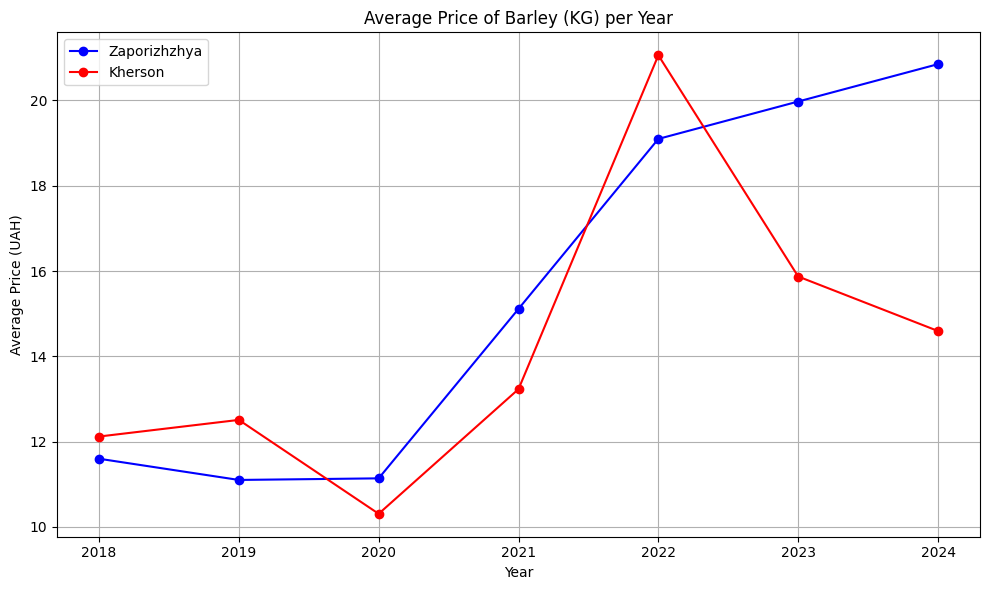

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(zaporizhzhya_avg_barley['year'], zaporizhzhya_avg_barley['price'], marker='o', color='b', label='Zaporizhzhya')
plt.plot(kherson_avg_barley['year'], kherson_avg_barley['price'], marker='o', color='r', label='Kherson')

plt.xlabel('Year')
plt.ylabel('Average Price (UAH)')
plt.title('Average Price of Barley (KG) per Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We can also plot the table into percentages increase over the years.

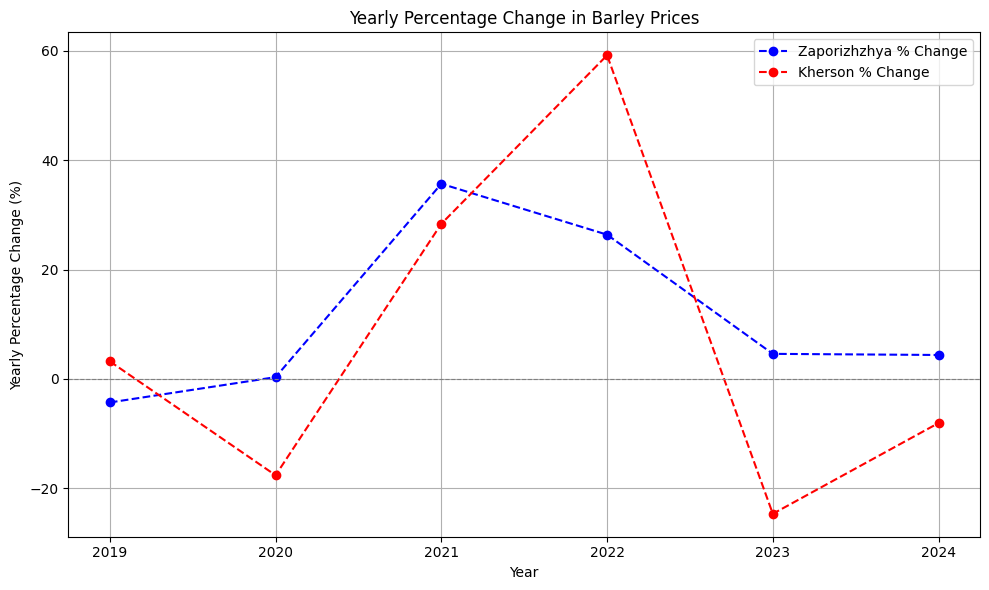

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(zaporizhzhya_avg_barley['year'], zaporizhzhya_avg_barley['pct_change'], marker='o', color='b', linestyle='--', label='Zaporizhzhya % Change')
plt.plot(kherson_avg_barley['year'], kherson_avg_barley['pct_change'], marker='o', color='r', linestyle='--', label='Kherson % Change')

plt.xlabel('Year')
plt.ylabel('Yearly Percentage Change (%)')
plt.title('Yearly Percentage Change in Barley Prices')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We can repeat the process with the beef prices.

In [23]:
zaporizhzhya_avg_beef = calculate_yearly_avg(df, 'Zaporizhzhya', 'meat, fish and eggs', 'Meat (beef)')
kherson_avg_beef = calculate_yearly_avg(df, 'Kherson', 'meat, fish and eggs', 'Meat (beef)')

In [24]:
print("\nZaporizhzhya Yearly Percentage Change in Beef Prices:")
print(zaporizhzhya_avg_beef[['year', 'price', 'pct_change']].to_string(index=False))

print("\nKherson Yearly Percentage Change in Beef Prices:")
print(kherson_avg_beef[['year', 'price', 'pct_change']].to_string(index=False))


Zaporizhzhya Yearly Percentage Change in Beef Prices:
 year      price  pct_change
 2014  58.190000         NaN
 2015  76.550000   31.551813
 2016  80.978333    5.784890
 2017  99.437273   22.794911
 2018 124.140000   24.842523
 2019 122.834167   -1.051904
 2020 134.791667    9.734669
 2021 165.248333   22.595363
 2022 199.081667   20.474236
 2023 225.651667   13.346282
 2024 263.528182   16.785391

Kherson Yearly Percentage Change in Beef Prices:
 year      price  pct_change
 2014  60.679000         NaN
 2015  80.910000   33.341024
 2016  84.235833    4.110534
 2017 103.480909   22.846662
 2018 124.340000   20.157429
 2019 124.406667    0.053616
 2020 144.466667   16.124538
 2021 164.183333   13.647900
 2022 241.502727   47.093327
 2023 221.828333   -8.146655
 2024 255.269091   15.075061


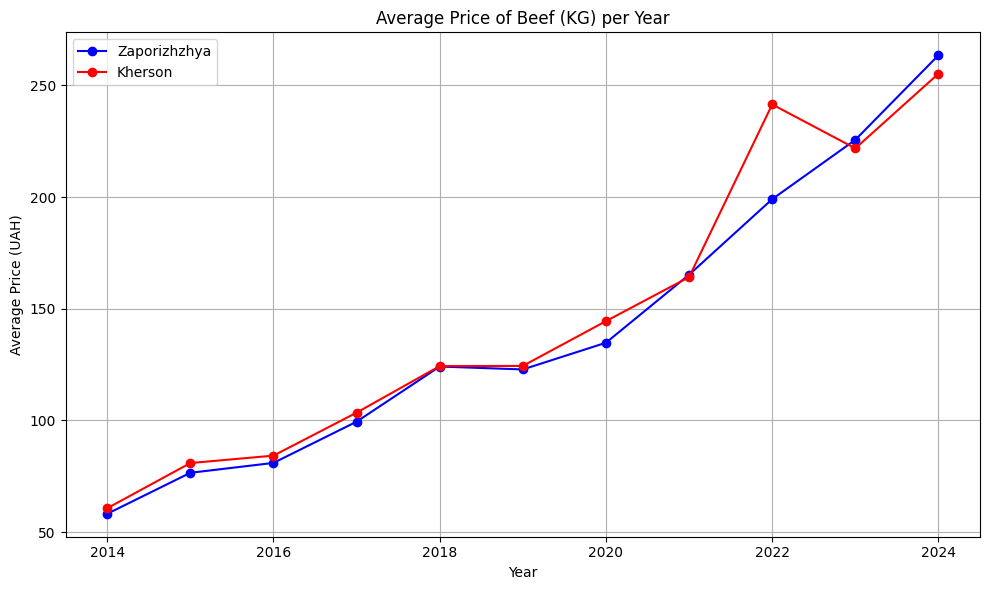

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(zaporizhzhya_avg_beef['year'], zaporizhzhya_avg_beef['price'], marker='o', color='b', label='Zaporizhzhya')
plt.plot(kherson_avg_beef['year'], kherson_avg_beef['price'], marker='o', color='r', label='Kherson')

plt.xlabel('Year')
plt.ylabel('Average Price (UAH)')
plt.title('Average Price of Beef (KG) per Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

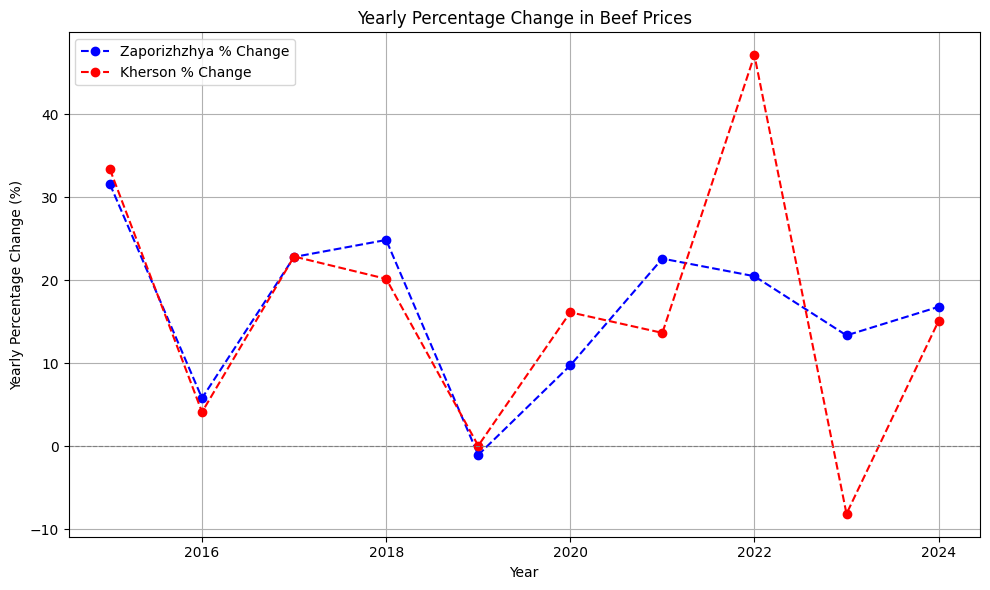

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(zaporizhzhya_avg_beef['year'], zaporizhzhya_avg_beef['pct_change'], marker='o', color='b', linestyle='--', label='Zaporizhzhya % Change')
plt.plot(kherson_avg_beef['year'], kherson_avg_beef['pct_change'], marker='o', color='r', linestyle='--', label='Kherson % Change')

plt.xlabel('Year')
plt.ylabel('Yearly Percentage Change (%)')
plt.title('Yearly Percentage Change in Beef Prices')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()